# Data Visualization

In [1]:
import pandas as pd             
import numpy as np

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv('train.csv')
all_data=df.copy(deep=True)
all_data_na = (all_data.isnull().sum(axis=0) / len(all_data)) * 100
from datetime import date
import datetime

df['Day'] = df['DATE'].apply(lambda x: 
                      (date(datetime.datetime.strptime(x,"%Y-%m-%d").year,datetime.datetime.strptime(x,"%Y-%m-%d").month,
                      datetime.datetime.strptime(x,"%Y-%m-%d").day)-date(2019,4,10)).days)
df.drop(['DATE'],axis=1,inplace=True)

target_variable='aircon_sum_target_next14d'
input_variables=df.columns[df.columns!=target_variable]

input_data=df.loc[:,input_variables]
target_data=df.loc[:,target_variable]



In [10]:
input_data.head()

,SITE_ID,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_TRP,CELL_TYPE_Tx site,CELL_TYPE_micro,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,...,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d,Day
0,146,1,0,0,0,0,3.0,0,0,0,...,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,0
1,146,1,0,0,0,0,3.0,0,0,0,...,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,1
2,146,1,0,0,0,0,3.0,0,0,0,...,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,2
3,146,1,0,0,0,0,3.0,0,0,0,...,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,3
4,146,1,0,0,0,0,3.0,0,0,0,...,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,4


In [11]:
input_data.describe()

,SITE_ID,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_TRP,CELL_TYPE_Tx site,CELL_TYPE_micro,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,...,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d,Day
count,621300.000000,621300.000000,621300.000000,621300.0,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,...,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000
mean,1315.745534,0.921777,0.000966,0.0,0.033317,0.036697,4.916948,0.112023,0.102366,0.102366,...,0.000071,0.000002,-0.000018,0.000369,-1.187480,-1.207066,-1.205633,-1.159289,-1.196703,149.500000
std,751.146117,0.268523,0.031061,0.0,0.179464,0.188018,7.553380,0.315395,0.303129,0.303129,...,0.054284,0.069885,0.187953,0.099940,0.375443,0.074639,0.159215,0.992414,0.166928,86.602129
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.990000,-4.400000,-14.490000,-3.450000,-1.920000,-1.830000,-1.730000,-1.910000,-1.890000,0.000000
25%,663.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308,74.750000
50%,1328.000000,1.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.212308,-1.212308,-1.212308,-1.210000,-1.210000,149.500000
75%,1965.000000,1.000000,0.000000,0.0,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.210000,-1.210000,-1.212308,-1.210000,-1.210000,224.250000
max,2604.000000,1.000000,1.000000,0.0,1.000000,1.000000,83.000000,1.000000,1.000000,1.000000,...,3.660000,4.520000,11.080000,4.160000,54.040000,15.040000,22.960000,222.250000,18.920000,299.000000


In [13]:
categorical_variables_mask = input_data.dtypes==object
categorical_variables = input_data.columns[categorical_variables_mask].tolist()
print(categorical_variables)
numerical_variables = input_data.columns[~categorical_variables_mask].tolist()
#numerical_variables.remove('NumberOfSales')
numerical_variables

[]


['SITE_ID',
 'CELL_TYPE_Macro',
 'CELL_TYPE_Mobil',
 'CELL_TYPE_TRP',
 'CELL_TYPE_Tx site',
 'CELL_TYPE_micro',
 'N_TRANSPORTED_SITES',
 'GEOGRAPHIC_CLUSTER_K_0',
 'GEOGRAPHIC_CLUSTER_K_1',
 'GEOGRAPHIC_CLUSTER_K_2',
 'GEOGRAPHIC_CLUSTER_K_3',
 'GEOGRAPHIC_CLUSTER_K_4',
 'GEOGRAPHIC_CLUSTER_K_5',
 'GEOGRAPHIC_CLUSTER_K_6',
 'GEOGRAPHIC_CLUSTER_K_7',
 'GEOGRAPHIC_CLUSTER_K_8',
 'GEOGRAPHIC_CLUSTER_K_9',
 'aircon_sum_wo_prev7d',
 'aircon_sum_wo_prev14d',
 'mean_temperature_prev7d',
 'max_temperature_prev7d',
 'min_temperature_prev7d',
 'mean_temperature_prev3d',
 'max_temperature_prev3d',
 'min_temperature_prev3d',
 'mean_rain_mm_prev7d',
 'max_rain_mm_prev7d',
 'min_rain_mm_prev7d',
 'mean_rain_mm_prev3d',
 'max_rain_mm_prev3d',
 'min_rain_mm_prev3d',
 'mean_humidity_prev7d',
 'max_humidity_prev7d',
 'min_humidity_prev7d',
 'mean_humidity_prev3d',
 'max_humidity_prev3d',
 'min_humidity_prev3d',
 'mean_wind_speed_prev7d',
 'max_wind_speed_prev7d',
 'min_wind_speed_prev7d',
 'mean_wind_sp

In [14]:
site_IDs=df['SITE_ID']
Dates=df['Day']
N_Transported_Sites=df[ 'N_TRANSPORTED_SITES']
Cell_Type=df.loc[:, 'CELL_TYPE_Macro': 'CELL_TYPE_micro']
Geographical_Cluster=df.loc[:, 'GEOGRAPHIC_CLUSTER_K_0': 'GEOGRAPHIC_CLUSTER_K_9']
m3_w_prevXd=df.loc[ :, 'mean_temperature_prev7d':  'min_pressure_prev3d']
m3_w_f_nextXd=df.loc[:,'mean_temperature_f_next14d':'min_pressure_f_next7d']
aircon_sum=df.loc[:,'aircon_sum_wo_prev7d':'aircon_sum_target_next14d']
cat_sum_alarms_prevXd=df.loc[:,'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
cat_m3_persistance_prevXd=df.loc[:,'equipment_max_persistance_prev7d':'temperature_min_persistance_prev3d']
skew_cat_alarms_prev14d=df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d=df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']
target_data=df.loc[:,'aircon_sum_target_next14d']

In [44]:
#df_row = pd.concat([df1, df2])
train_data=pd.concat([m3_w_prevXd,m3_w_f_nextXd,cat_sum_alarms_prevXd,cat_m3_persistance_prevXd], axis=1)
#np.shape(cat_m3_persistance_prevXd)
train_data

,mean_temperature_prev7d,max_temperature_prev7d,min_temperature_prev7d,mean_temperature_prev3d,max_temperature_prev3d,min_temperature_prev3d,mean_rain_mm_prev7d,max_rain_mm_prev7d,min_rain_mm_prev7d,mean_rain_mm_prev3d,...,fire/smoke_min_persistance_prev3d,ge_max_persistance_prev3d,ge_mean_persistance_prev3d,ge_min_persistance_prev3d,power_max_persistance_prev3d,power_mean_persistance_prev3d,power_min_persistance_prev3d,temperature_max_persistance_prev3d,temperature_mean_persistance_prev3d,temperature_min_persistance_prev3d
0,10.29,14.0,6.0,12.00,14.0,9.0,1.33,8.5,0.0,3.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.71,16.0,9.0,13.00,16.0,9.0,1.90,8.5,0.0,4.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.57,16.0,9.0,13.00,16.0,9.0,4.70,19.6,0.0,7.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.29,16.0,8.0,11.00,16.0,8.0,4.77,19.6,0.0,8.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.57,16.0,5.0,7.33,9.0,5.0,5.39,19.6,0.3,8.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621295,4.00,7.0,1.0,5.33,6.0,5.0,3.57,18.2,0.0,8.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621296,4.29,7.0,1.0,4.67,6.0,3.0,3.89,18.2,0.0,3.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621297,4.71,7.0,3.0,4.00,5.0,3.0,4.04,18.2,0.0,2.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621298,5.57,9.0,3.0,5.33,9.0,3.0,4.04,18.2,0.0,1.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

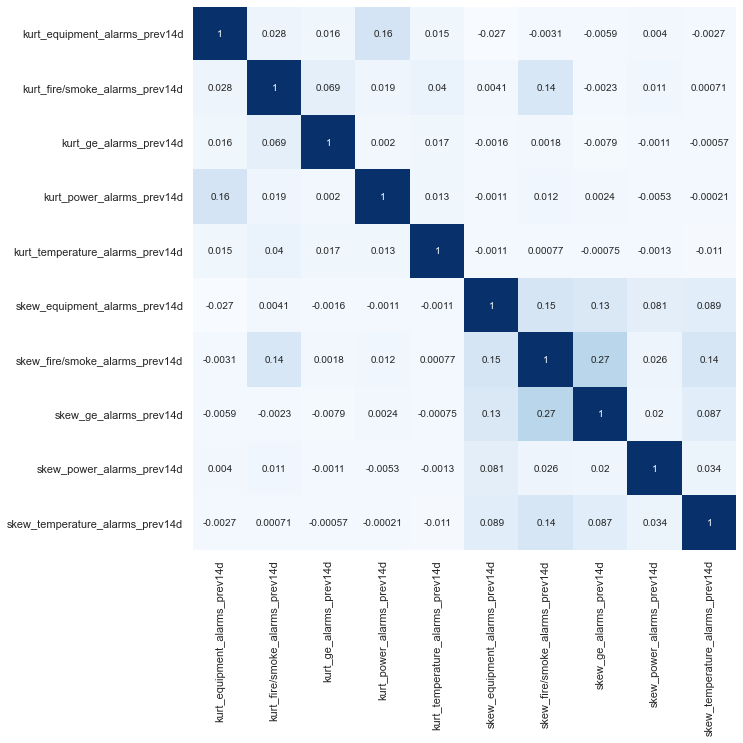

In [43]:
cov=pd.concat([kurt_cat_alarms_prev14d,skew_cat_alarms_prev14d],axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

<AxesSubplot:>

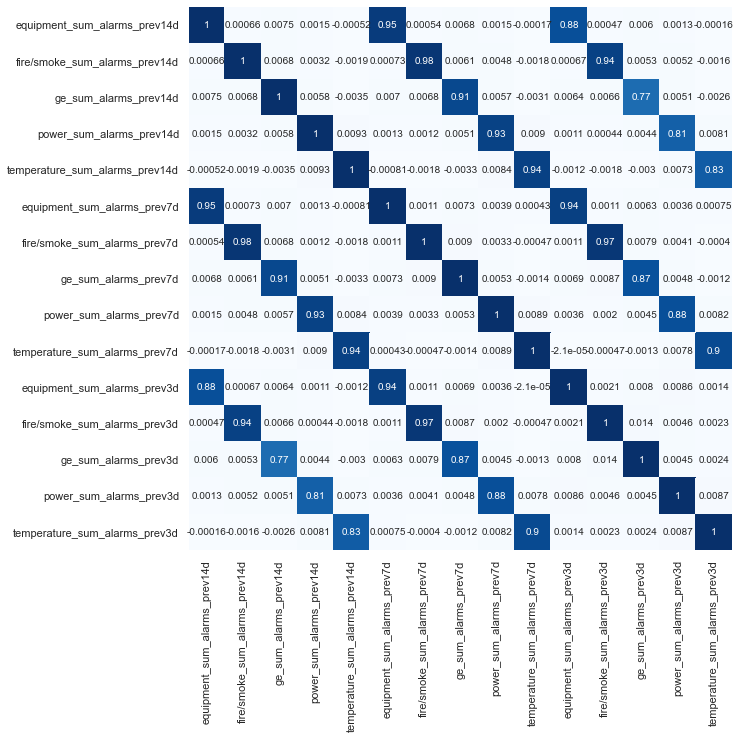

In [51]:
cov=pd.concat([cat_sum_alarms_prevXd], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

<AxesSubplot:>

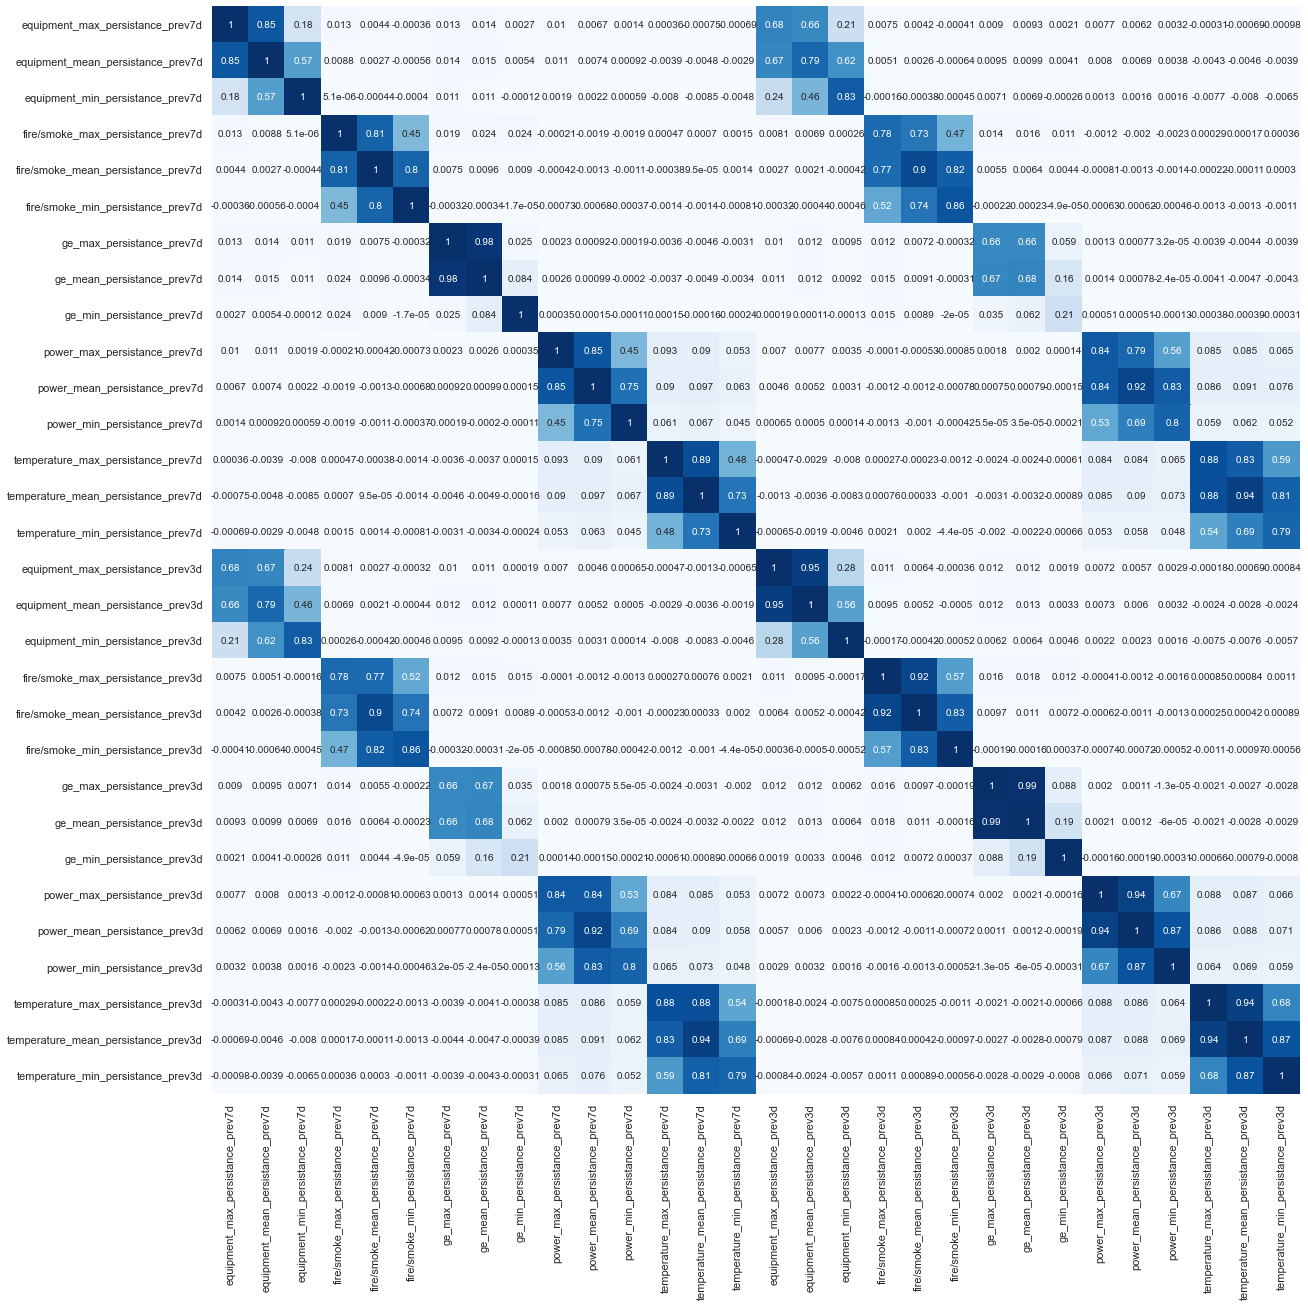

In [58]:
cov=pd.concat([cat_m3_persistance_prevXd], axis=1).corr(method='pearson')
plt.figure(figsize = (20,20))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

<AxesSubplot:>

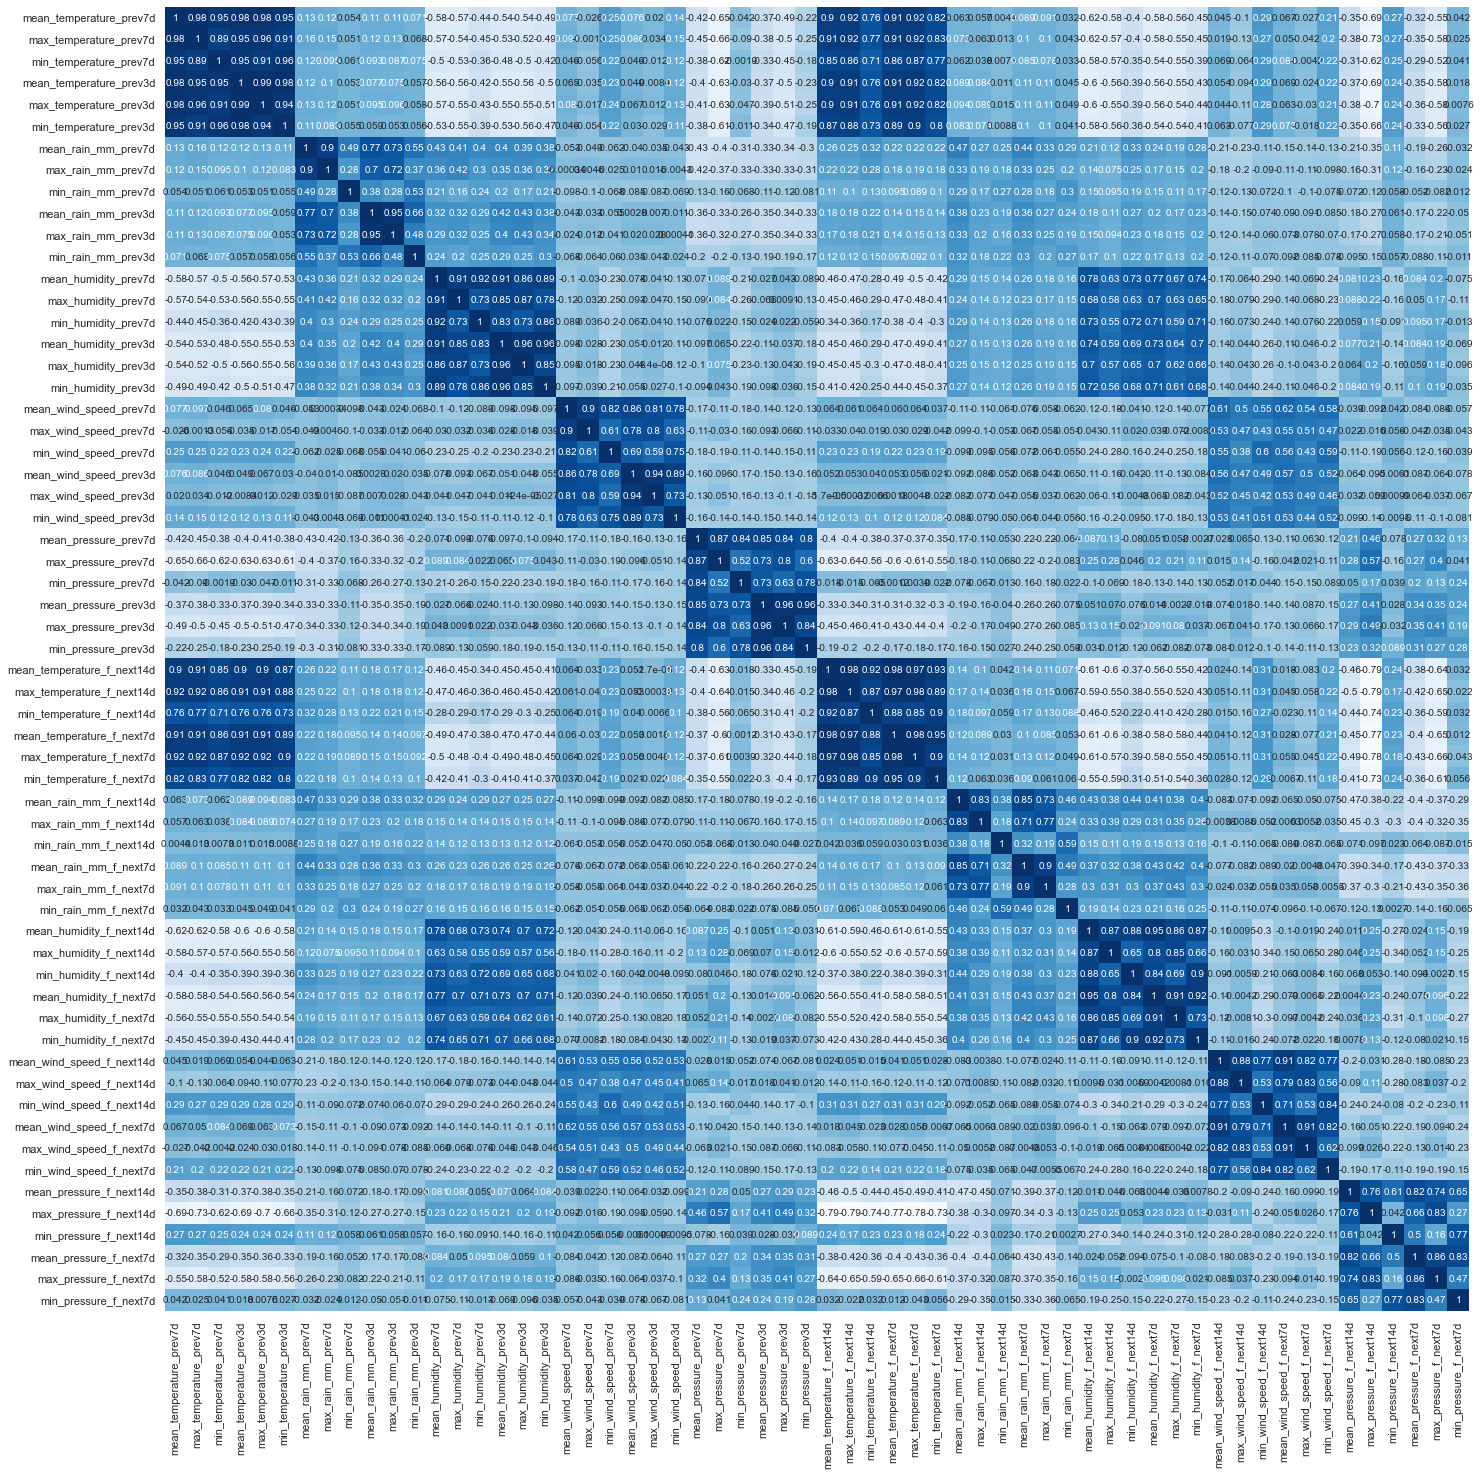

In [62]:
cov=pd.concat([m3_w_prevXd,m3_w_f_nextXd], axis=1).corr(method='pearson')
plt.figure(figsize = (24,24))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

# Variables Analysis

value counts
2047    300
680     300
672     300
2208    300
161     300
       ... 
340     300
852     300
1364    300
1876    300
0       300
Name: SITE_ID, Length: 2071, dtype: int64
Null Values:  False


<AxesSubplot:>

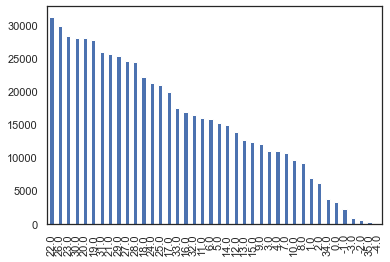

In [36]:
#StoreType: 4 types
print('value counts')
print(input_data['SITE_ID'].value_counts())
print("Null Values: ",input_data['SITE_ID'].isnull().any())
input_data['max_temperature_prev7d'].value_counts().plot.bar()

In [34]:
np.min(input_data['SITE_ID'].value_counts())

300

In [32]:
#AssortmentType
print(train_data['AssortmentType'].value_counts())
print("Null Values: ",train_data['AssortmentType'].isnull().any())
train_data['AssortmentType'].value_counts().plot.bar()

KeyError: 'AssortmentType'

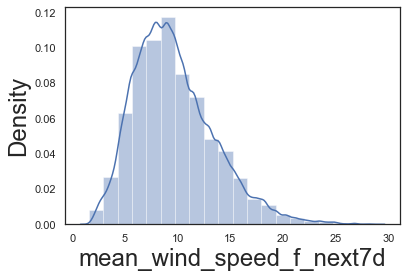

In [63]:
#NearestCompetitor
hist1 = sns.distplot(train_data['mean_wind_speed_f_next7d'],bins=20)

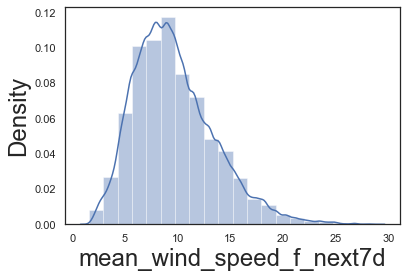

In [65]:
hist2 = sns.distplot(train_data[train_data['mean_wind_speed_f_next7d']<20000]['mean_wind_speed_f_next7d'],bins=20)